In [1]:
import datajoint as dj

Add the directories

In [2]:
import sys
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\pipeline') # go to parent dir
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\scripts')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-ephys\\development')
sys.path.append('c:\\Users\\liul.HHMI\\Desktop\\map-lab')

Insert data and drop databases (Only use if you know what you are doing)

In [3]:
import mock

Connecting daveliu@mesoscale-activity.datajoint.io:3306


In [13]:
#mock.dropdbs()

dropping databases
error dropping ccf in attempt 0: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')
error dropping ccf in attempt 1: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')
error dropping ccf in attempt 2: (1451, 'Cannot delete or update a parent row: a foreign key constraint fails')


Entity Relation Diagrams (ERDs)

In [6]:
import lab
dj.ERD(lab)

In [8]:
import experiment
dj.ERD(experiment)

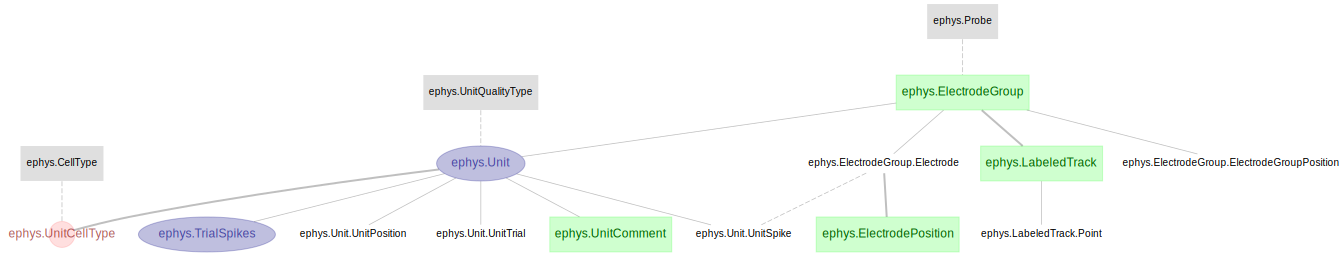

In [10]:
import ephys
dj.ERD(ephys)

Ingest data

In [4]:
import mapshell

c:\users\liul.hhmi\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
mapshell.discover()

dl4_TW_autoTrain_20170929_125803.mat skipped - no animal for dl4
dl4_TW_autoTrain_20170930_124926.mat skipped - no animal for dl4
dl4_TW_autoTrain_20170930_134651.mat skipped - no animal for dl4
dl4_TW_autoTrain_20170930_134813.mat skipped - no animal for dl4
dl4_TW_autoTrain_20170930_141758.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171001_130306.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171001_143259.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171002_125120.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171002_125854.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171002_140059.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171003_122705.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171003_131522.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171003_134307.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171004_130238.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171004_140816.mat skipped - no animal for dl4
dl4_TW_autoTrain_20171005

In [6]:
mapshell.populateB()

no file matches found for tw5 / 20171017
no file matches found for tw5 / 20171018
no file matches found for tw5 / 20171019
no file matches found for tw5 / 20171020
no file matches found for tw5 / 20171021
no file matches found for tw5 / 20171023
no file matches found for tw5 / 20171024
no file matches found for tw5 / 20171025
no file matches found for tw5 / 20171026
no file matches found for tw5 / 20171027
no file matches found for tw5 / 20171028
no file matches found for tw5 / 20171029
no file matches found for tw5 / 20171030
no file matches found for dl7 / 20171128
no file matches found for dl7 / 20171129
no file matches found for dl7 / 20171130
no file matches found for dl7 / 20171201
no file matches found for dl7 / 20171202
no file matches found for dl7 / 20171203
no file matches found for dl7 / 20171204
no file matches found for dl7 / 20171205
no file matches found for dl7 / 20171206
no file matches found for dl7 / 20171207
no file matches found for dl7 / 20171208
no file matches 

In [13]:
mapshell.populateE()

Plot some behavior data

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as spio
import numpy as np

In [8]:
import ephys
trialNote = ephys.experiment.TrialNote()

In [9]:
animal = 407513
sessionN = 2

In [10]:
behaviorTrial = ephys.experiment.BehaviorTrial()

In [11]:
outcome = (behaviorTrial & {'subject_id': animal} & {'session': sessionN}).fetch('outcome', order_by='session')
early_lick = (behaviorTrial  & {'subject_id': animal} & {'session': sessionN}).fetch('early_lick', order_by='session')

In [12]:
data = np.zeros(len(outcome))
data1 = np.zeros(len(early_lick))

In [13]:
data[outcome=='hit'] = 1
data1[early_lick=='early'] = 1

In [14]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Text(0,0.5,'Proportion Correct')

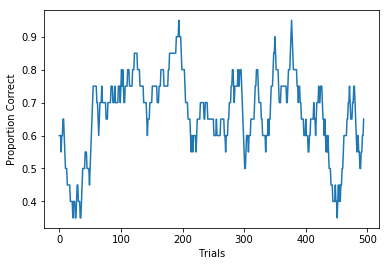

In [15]:
yMA = movingaverage(data,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Proportion Correct')

Text(0,0.5,'Early Licks')

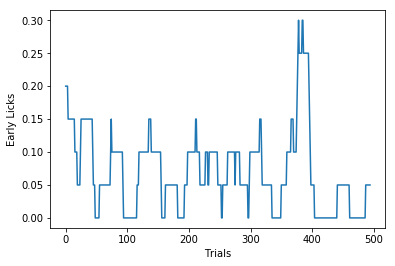

In [16]:
yMA = movingaverage(data1,20)
plt.plot(yMA)
plt.xlabel('Trials')
plt.ylabel('Early Licks')